In [1]:
from pygame.locals import KEYDOWN, K_ESCAPE, K_q, K_u
import pygame
import cv2
import sys
import numpy as np 
import os 
from eyes import eyes
from face2coord import face2coord
import time 
from geomdl import fitting


hh = np.linspace(0.0, 1.0, num=10)**2 #[0.1, 0.5, 0.7, 0.9, 1]
hhh = 1-np.linspace(0.0, 1.0, num=10)**2 #[0.9, 0.5, 0.3, 0.1, 0]

class full_eye():
    def __init__(self):
        self.e = eyes()
        self.cam = face2coord(0, "none", 2, "face", 0.9)
        self.prev_x, self.prev_y = [0.5, 0.5] 
        self.coord_list = [[0.5,0.51], [0.52,0.52], [0.51,0.51], [0.51,0.53]] 
        self.n_noface = 0

        os.environ["SDL_VIDEO_CENTERED"] = "1"
        pygame.init()
        info = pygame.display.Info()
        width, height = (1600, 800) #info.current_w, info.current_h
        self.screen = pygame.display.set_mode((width, height), pygame.NOFRAME)
        print(width, height)
        #pygame.init()
        #pygame.display.set_caption("OpenCV camera stream on Pygame")
        #screen = pygame.display.set_mode([640, 480])#, pygame.FULLSCREEN)
        
    def update(self):
        self.screen.fill([0, 0, 0])
        x,y = self.cam.get_face_coords() 
        if [x,y] == [0.5, 0.5]:
            self.n_noface += 1
        else:
            self.n_noface = 0
            [x,y] = [x,y] + np.random.normal(size = [2])/300
            self.coord_list.append([x,y])
            self.coord_list.pop(0)
        #print(self.coord_list)
        curve = fitting.approximate_curve(self.coord_list, 2)
        curve.delta = 1/30
        x_tmp, y_tmp = np.array(curve.evalpts)[:,0], np.array(curve.evalpts)[:,1]
        
        for i in range(10):
            #x_c, y_c = (self.prev_x*hhh[i]+x*hh[i], self.prev_y*hhh[i]+y*hh[i])
            x_c, y_c = x_tmp[20+i], y_tmp[20+i]
            pygame.surfarray.blit_array(self.screen, cv2.resize(np.vstack([self.e.simple_eye(x_c, 1-y_c)]*2), (800, 1600)))
            pygame.display.update()
            time.sleep(0.01)
        self.prev_x, self.prev_y = (x, y)
    
    def kill(self):
        pygame.quit()
        self.cam.release()


#tmp = full_eye()


pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [10]:
e = eyes()
(e.simple_eye(0.5, 0.5)).shape

1920 1080


(800, 800, 3)

In [2]:
import time 
tmp = full_eye()
for i in range(100):
    tmp.update()
    #time.sleep(0.1)
    
tmp.kill()

1920 1080
face_recognition
1600 800
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
(0.7895833333333333, 0.3671875)
(0.7604166666666666, 0.5453125)
(0.7041666666666667, 0.6015625)
(0.6604166666666667, 0.6015625)
(0.51875, 0.3859375)
(0.43125, 0.2328125)
(0.51875, 0.234375)
(0.51875, 0.20625)
(0.51875, 0.20625)
(0.43125, 0.171875)
(0.43125, 0.171875)
(0.43125, 0.171875)
(0.5479166666666667, 0.3203125)
(0.5895833333333333, 0.5484375)
(0.5895833333333333, 0.6546875)
(0.5895833333333333, 0.7609375)
(0.5895833333333333, 0.7875)
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
(0.4895833333333333, 0.3671875)
(0.6104166666666667, 0.19375)
[0.5, 0.5]
[0.5, 0.5]
[0.5, 

In [8]:
tmp.kill()

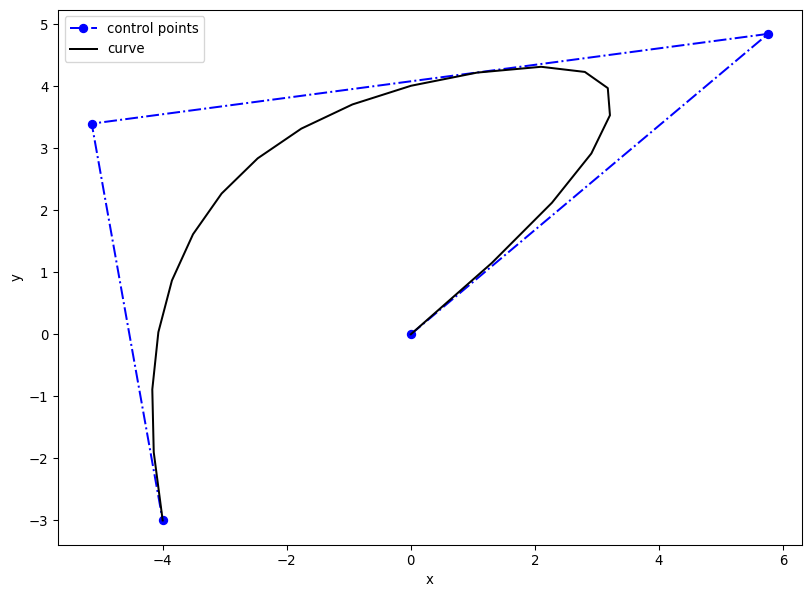

In [4]:
from geomdl import fitting
from geomdl.visualization import VisMPL as vis

# The NURBS Book Ex9.1
points = ((0, 0), (3, 4), (-1, 4), (-4, 0), (-4, -3))
degree = 2  # cubic curve

# Do global curve approximation
curve = fitting.approximate_curve(points, degree)

# Plot the interpolated curve
curve.delta = 0.05
curve.vis = vis.VisCurve2D()
curve.render()

In [10]:
points = ((3, 4), (-1, 4), (-4, 0), (-4, -3), (-1, -6))
degree = 2  # cubic curve

# Do global curve approximation
curve2 = fitting.approximate_curve(points, degree)

# Plot the interpolated curve
curve2.delta = 1/40

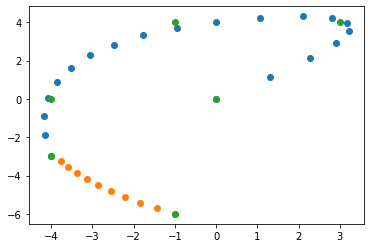

In [12]:
import matplotlib.pyplot as plt 
plt.scatter(np.array(curve.evalpts)[:,0], np.array(curve.evalpts)[:,1])
plt.scatter(np.array(curve2.evalpts)[-10:,0], np.array(curve2.evalpts)[-10:,1])
x = np.array(((0, 0), (3, 4), (-1, 4), (-4, 0), (-4, -3), (-1, -6)))
plt.scatter(x[:,0], x[:,1])

In [115]:
np.random.normal(size = [2])/100

array([-0.01468143, -0.00871552])

In [1]:
import pygame
pygame.init()
screen = pygame.display.set_mode((1600, 800)) #x and y are height and width

pygame.draw.circle(screen, (0,0,0), (200, 200), 100, 10)

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


<rect(100, 100, 200, 200)>